# Step response of a second order linear system

The system is given by the differential equation
$$ \ddot{y} + 2\zeta\omega_n\dot{y} + \omega_n^2 y = \omega_n^2 u. $$
which on transfer function form is
$$ Y(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2} U(s). $$

Factorizing the denominator of the transfer function gives
$$ Y(s) = \frac{\omega_n^2}{\left(s + \zeta\omega_n + i\omega_n\sqrt{1- \zeta^2}\right)\left(s + \zeta\omega_n - i\omega_n\sqrt{1- \zeta^2}\right)} U(s) $$
If $\zeta \ge 1$, then the two poles are real.

In [1]:
using Interact
using ControlSystems
using Gadfly

    +(AbstractArray, DataArrays.DataArray) at /home/kjartan/.julia/v0.4/DataArrays/src/operators.jl:276
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /home/kjartan/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.DataArray{T<:Any, 2})
before the new definition.
    +(AbstractArray, DataArrays.AbstractDataArray) at /home/kjartan/.julia/v0.4/DataArrays/src/operators.jl:300
is ambiguous with: 
    +(WoodburyMatrices.SymWoodbury, AbstractArray{T<:Any, 2}) at /home/kjartan/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:107.
To fix, define 
    +(WoodburyMatrices.SymWoodbury, DataArrays.AbstractDataArray{T<:Any, 2})
before the new definition.


Interact.Slider{Float64}(Signal{Float64}(1.0, nactions=0),"ωn",1.0,0.0:0.02:2.0,".3f",true)

Interact.Slider{Float64}(Signal{Float64}(0.5, nactions=0),"ζ",0.5,0.0:0.1:1.0,".3f",true)

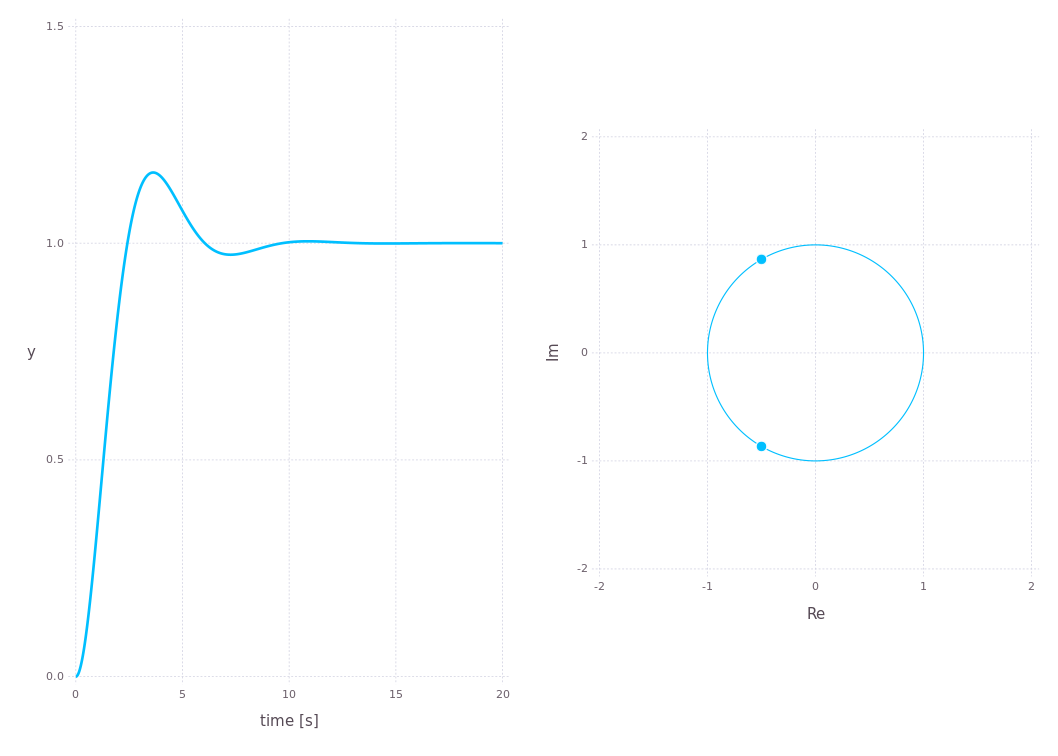

In [27]:
set_default_plot_size(28cm, 20cm)

N = 1200; # Number of samples

t = collect(linspace(0, 20, N)); # 60 values per second 

# The input step
u = ones(N);

@manipulate for ωn in 0:0.02:2, ζ in 0:0.1:1.0
    G = minreal(tf([ωn^2], [1.0, 2*ζ*ωn, ωn^2]));
    yr, t_out, x = lsim(G, u, t);
    stp = plot(x=t, y=yr, Geom.line, Guide.xlabel("time [s]"), Guide.ylabel("y"), style(line_width=2pt))
    pp = plot(layer(x = -ζ*ωn*[1, 1], y=sqrt(1 - ζ^2)*ωn*[1, -1], Geom.point, style(default_point_size=4pt)), 
    layer(x=cos(linspace(0,2π,300)), y=sin(linspace(0,2π,300)), Geom.path),Guide.xlabel("Re"), Guide.ylabel("Im"), 
    Coord.cartesian(xmin=-2, xmax=2, ymin=-2, ymax=2, aspect_ratio=1))
    fig1 = hstack(stp, pp)

end